In [220]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import decomposition
import matplotlib.pyplot as plt
import pandas as pd
import calendar
import sklearn.preprocessing as pre_processing
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [36]:
datasets = pd.read_excel('..\【071】单车日报表.xlsx')

#载入维度数据
x_data = datasets[[ '吨位', '当日有派车次数',
                   '全天行驶里程km', '其中任务行驶里程km', '全天运行时长（点火时长）hh', '其中任务行驶时长hh', '全天静驶时长',
                   '平均时速km/h', '最大扭距', '平均扭距', '急刹车次数', '超速报警次数', '前3日平均运行里程km', '前3日日平均运行时长h',
                   '近4日平均运行里程km', '近4日日平均运行时长h', '怠速次数', '怠速时长mm', '任务百公里油耗（L）', '全里程百公里油耗（L）'
                   , '高档低速次数', '高档低速累计时长mm', '低档高速次数', '低档高速累计时长mm', '空档滑行次数', '空档滑行时长mm',
                   'Can设备状态',  '市趟次数', '一干次数', '二干次数', '里程标杆值km',
                  '实际里程参考值km', '位置总数', '未锁星数', '延迟位置数',
                   '行驶位置数', '间隔大位置数', 'ACC关位置数',  '行驶时长', '拉直线次数', '拉直线总距离', 
                   '设备类型', '在线时长', '里程误差']]
x_data = x_data.replace([np.inf, -np.inf], np.nan)
x_data = x_data.fillna(0)



#分割数据1/4为测试，3/4为训练数据
#载入标签数据
y_data = datasets['油耗量（当天）']

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.3)

print(y_train.isnull().any())
print(x_train.info())

'''
'日期y/m/d', '车牌号', '配属单位', '使用单位', '车辆名称', '规格型号', '登记日期', '吨位', '当日有派车次数',
                   '全天行驶里程km', '其中任务行驶里程km', '全天运行时长（点火时长）hh', '其中任务行驶时长hh', '全天静驶时长',
                   '平均时速km/h', '最大扭距', '平均扭距', '急刹车次数', '超速报警次数', '前3日平均运行里程km', '前3日日平均运行时长h',
                   '近4日平均运行里程km', '近4日日平均运行时长h', '怠速次数', '怠速时长mm', '任务百公里油耗（L）', '全里程百公里油耗（L）'
                   , '高档低速次数', '高档低速累计时长mm', '低档高速次数', '低档高速累计时长mm', '空档滑行次数', '空档滑行时长mm',
                   'Can设备状态', '车型', '单位分组', '能源类型',  '市趟次数', '一干次数', '二干次数', '里程标杆值km',
                   '里程利用率', '时长标杆值h', '时长利用率', '实际里程参考值km', '位置总数', '未锁星数', '未锁星占比', '延迟位置数',
                   '行驶位置数', '间隔大位置数', 'ACC关位置数', '行驶时长', '拉直线次数', '拉直线总距离', '设备序列号', 
                   '设备类型', '在线时长', '设备状态', '24小时内离线', '里程误差', '报废状态', '311/388/29/72批次', '294无里程关注', 
                   '930速递', '118重汽'
                   
'''
'''
label=pre_processing.LabelEncoder()
labels=label.fit_transform(['中','符','法','吧'])
print(labels)
'''




#查看非数值的列
unvalue_type = x_data.select_dtypes(include=object, exclude=None)
unvalue_type.columns.values.tolist()



True
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 2622 to 1429
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   吨位              2121 non-null   float64
 1   当日有派车次数         2121 non-null   float64
 2   全天行驶里程km        2121 non-null   float64
 3   其中任务行驶里程km      2121 non-null   float64
 4   全天运行时长（点火时长）hh  2121 non-null   float64
 5   其中任务行驶时长hh      2121 non-null   float64
 6   全天静驶时长          2121 non-null   float64
 7   平均时速km/h        2121 non-null   float64
 8   最大扭距            2121 non-null   float64
 9   平均扭距            2121 non-null   float64
 10  急刹车次数           2121 non-null   float64
 11  超速报警次数          2121 non-null   float64
 12  前3日平均运行里程km     2121 non-null   float64
 13  前3日日平均运行时长h     2121 non-null   float64
 14  近4日平均运行里程km     2121 non-null   float64
 15  近4日日平均运行时长h     2121 non-null   float64
 16  怠速次数            2121 non-null   float64
 17  怠速时长mm          2121 non-

[]

In [37]:
# standardize the feature 标准化
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)
x_train_std.shape

(2121, 44)

In [28]:
#jupyter notebook显示最大行列数
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',1000)
x_train.describe()

,吨位,当日有派车次数,全天行驶里程km,其中任务行驶里程km,全天运行时长（点火时长）hh,其中任务行驶时长hh,全天静驶时长,平均时速km/h,最大扭距,平均扭距,急刹车次数,超速报警次数,前3日平均运行里程km,前3日日平均运行时长h,近4日平均运行里程km,近4日日平均运行时长h,怠速次数,怠速时长mm,任务百公里油耗（L）,全里程百公里油耗（L）,高档低速次数,高档低速累计时长mm,低档高速次数,低档高速累计时长mm,空档滑行次数,空档滑行时长mm,Can设备状态,市趟次数,一干次数,二干次数,里程标杆值km,实际里程参考值km,位置总数,未锁星数,延迟位置数,行驶位置数,间隔大位置数,ACC关位置数,行驶时长,拉直线次数,拉直线总距离,设备类型,在线时长,里程误差
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.0,2121.0,2121.000000,2121.0,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.0,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.0,2121.000000,2121.000000
mean,2.919255,0.243281,57.520132,16.361433,2.392263,0.257718,1.082301,23.850071,0.0,0.0,16.550684,0.0,58.052230,2.386926,59.412739,2.456478,14.882603,28.630448,1.122574,6.353140,7.315417,12.612570,7.390382,1.864342,0.808581,0.438241,1.944366,0.224894,0.018388,0.0,83.540996,57.034564,661.332862,59.842527,6.220651,349.570486,1.004715,111.570957,1.309981,0.006129,0.165865,0.0,6.106822,-0.485568
std,4.409930,0.996803,98.608028,84.548588,2.927280,1.254474,1.723078,22.014664,0.0,0.0,42.283471,0.0,85.174947,2.622189,85.661147,2.624815,24.370874,54.308031,4.415917,12.445704,20.259100,61.531713,16.694689,4.513536,6.385726,4.034784,0.999395,0.987594,0.162937,0.0,113.764353,97.047251,756.417968,165.042958,56.413085,493.300043,3.167788,255.154450,1.706114,0.083892,3.424394,0.0,8.185469,18.885067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-849.500000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.100000
50%,1.000000,0.000000,27.000000,0.000000,1.600000,0.000000,0.500000,28.000000,0.0,0.0,0.000000,0.0,36.570000,1.930000,39.650000,2.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,92.140828,27.010000,401.000000,1.000000,0.000000,141.000000,0.000000,0.000000,0.880000,0.000000,0.000000,0.0,2.850000,0.000000
75%,4.000000,0.000000,79.900000,0.000000,4.000000,0.000000,1.600000,43.000000,0.0,0.0,0.000000,0.0,81.000000,3.870000,79.900000,3.900000,26.000000,40.350000,0.000000,10.200000,2.000000,0.420000,4.000000,0.980000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,103.264706,79.560000,1173.000000,83.000000,1.000000,539.000000,0.000000,45.000000,2.100000,0.000000,0.000000,0.0,7.770000,0.110000
max,35.000000,21.000000,1147.200000,1145.500000,23.950000,16.300000,23.950000,107.000000,0.0,0.0,326.000000,0.0,796.600000,23.790000,772.620000,23.750000,147.000000,441.420000,35.940000,100.000000,223.000000,909.170000,135.000000,43.750000,195.000000,104.550000,3.000000,21.000000,4.000000,0.0,600.000000,1148.000000,7391.000000,2781.000000,1572.000000,4203.000000,37.000000,1440.000000,16.400000,2.000000,140.800000,0.0,23.980000,4.800000


In [29]:
x_train_std

array([[-0.0383895 ,  6.77998693,  1.55784562, ...,  0.        ,
         0.52216744,  0.14223945],
       [ 2.05964423,  0.75932447,  3.38165656, ...,  0.        ,
         0.42685416, -0.02195013],
       [-0.4353148 , -0.24411927, -0.58345854, ...,  0.        ,
        -0.74623242,  0.02571781],
       ...,
       [-0.4353148 , -0.24411927, -0.58345854, ...,  0.        ,
        -0.74623242,  0.02571781],
       [-0.4353148 , -0.24411927, -0.58345854, ...,  0.        ,
        -0.74623242,  0.02571781],
       [-0.4353148 , -0.24411927, -0.58345854, ...,  0.        ,
        -0.74623242,  0.02571781]])

In [30]:
cov_matrix = np.cov(x_train_std.T)
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)
print("values\n ", eigen_val, "\nvector\n ", eigen_vec)# 可以打印看看

values
  [ 1.34218297e+01  4.62608904e+00  2.69545107e+00  2.23512508e+00
  1.88258325e+00  1.68556274e+00  1.42659186e+00  1.27334802e+00
  1.07028751e+00  1.00016933e+00  8.99654781e-01  8.10829330e-01
  7.64345386e-01  6.87064745e-01  5.97716229e-01  5.83867530e-01
  4.63120300e-01  4.03707354e-01  3.94340303e-01  3.38728952e-01
  3.44933080e-01  3.11430740e-01  1.92133916e-01  1.81479195e-01
  1.65553178e-01  1.43526062e-01  1.15592042e-01  1.04966777e-01
  8.51894183e-02  4.01176154e-02  2.16928232e-02  1.69372567e-02
  1.57420501e-02  1.33789629e-02  4.32275893e-03  9.87172937e-04
  6.39884407e-07 -8.11228660e-16  1.37182171e-15  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00] 
vector
  [[ 0.14000522 -0.10690607  0.10541464 ...  0.          0.
   0.        ]
 [ 0.09428171 -0.04091067 -0.02892923 ...  0.          0.
   0.        ]
 [ 0.24851295 -0.10864593 -0.04042175 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...

In [44]:
x_train = x_train.fillna(x_train.mean())
y_train = y_train.fillna(y_train.mean())

In [227]:
rfc = RandomForestRegressor(n_estimators = 1000,n_jobs = -1 ,random_state = 20,min_samples_leaf = 5)
rfc.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=5, n_estimators=1000, n_jobs=-1,
                      random_state=20)

In [228]:
y_predict = rfc.predict(x_test)

In [229]:
#consumption fuel prediction accuracy
rfc.score(x_test,y_test)

0.9382075368046675

# Feature Importance

In [203]:
imp = rfc.feature_importances_
imp

array([2.21948051e-03, 8.42356353e-05, 3.30839871e-02, 4.18751883e-03,
       7.95849940e-03, 8.69940514e-05, 2.73397129e-04, 2.02723724e-03,
       0.00000000e+00, 0.00000000e+00, 3.11264391e-02, 0.00000000e+00,
       2.30542459e-03, 4.47726854e-04, 5.85730314e-03, 2.61943900e-03,
       3.41198850e-03, 2.32479862e-02, 7.10407115e-04, 2.35834965e-02,
       1.32230319e-02, 7.38461297e-01, 1.30552132e-04, 2.70147856e-04,
       3.62846841e-04, 1.80808623e-03, 2.14366051e-08, 6.33833932e-05,
       5.60093487e-05, 0.00000000e+00, 2.35055362e-04, 7.68576607e-02,
       4.29204400e-04, 2.97413595e-04, 9.87111382e-05, 1.27234022e-03,
       1.30061560e-03, 2.59844861e-04, 1.49058867e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.68934204e-03, 5.04698788e-03])

In [204]:
x = str(imp)
type(x)

str

In [205]:
names = x_data.columns.values.tolist()  
names

['吨位',
 '当日有派车次数',
 '全天行驶里程km',
 '其中任务行驶里程km',
 '全天运行时长（点火时长）hh',
 '其中任务行驶时长hh',
 '全天静驶时长',
 '平均时速km/h',
 '最大扭距',
 '平均扭距',
 '急刹车次数',
 '超速报警次数',
 '前3日平均运行里程km',
 '前3日日平均运行时长h',
 '近4日平均运行里程km',
 '近4日日平均运行时长h',
 '怠速次数',
 '怠速时长mm',
 '任务百公里油耗（L）',
 '全里程百公里油耗（L）',
 '高档低速次数',
 '高档低速累计时长mm',
 '低档高速次数',
 '低档高速累计时长mm',
 '空档滑行次数',
 '空档滑行时长mm',
 'Can设备状态',
 '市趟次数',
 '一干次数',
 '二干次数',
 '里程标杆值km',
 '实际里程参考值km',
 '位置总数',
 '未锁星数',
 '延迟位置数',
 '行驶位置数',
 '间隔大位置数',
 'ACC关位置数',
 '行驶时长',
 '拉直线次数',
 '拉直线总距离',
 '设备类型',
 '在线时长',
 '里程误差']

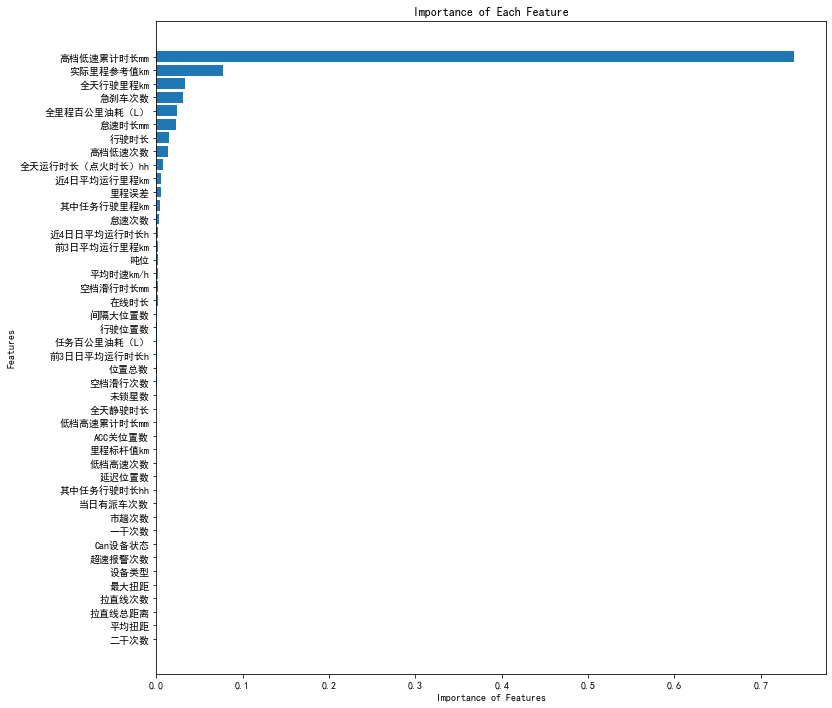

In [219]:
zip(imp,names)
imp,names = zip(*sorted(zip(imp,names)))

fig = plt.figure(figsize=(12,12))
plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.xlabel('Importance of Features')
plt.ylabel('Features')
#plt.xticks(fontsize=20)
plt.yticks(fontsize=10)

#for a,b in zip(imp,names):
 #   plt.text(a+0.05, b, '%.3f' % a, ha='center', va= 'bottom',fontsize=7)
    
plt.title('Importance of Each Feature')
plt.savefig('./Importance of Each Feature.jpg')
plt.show()



AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'

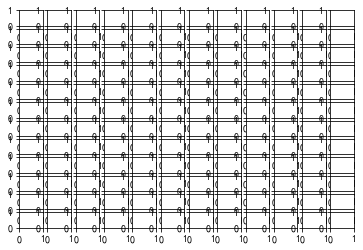

In [223]:
result = permutation_importance(rfc, x_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
#fig = plt.figure(figsize=(12,12))
fig, ax = plt.subplots(12,12)
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=x_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

In [168]:
def plot_feature_importances(feature_importances,title,feature_names,change):
    print('feature_importances',feature_importances)
    print('names',feature_names)
#     feature_importances = 100.0*(feature_importances/max(feature_importances))

#     print('feature_importances',feature_importances)
#     将得分从小到大排序
    index_sorted = np.argsort(feature_importances)
    print('index_sorted',index_sorted)
   #特征名称排序
    chara= change
    i = 44
    for col in range(0,i):
        chara[col] = feature_names[index_sorted[col]]
    print(chara)
    
    
#     让y坐标轴上的标签居中显示
    pos = np.arange(index_sorted.shape[0])+0.5
    print(pos)
    plt.figure(figsize=(16,16))
    #0.9的分割数据
    index1 = [i] * i
    index2 = [i] * i
    feature_importances = np.append(feature_importances,0)
   
    print('feature_importances',feature_importances)
    sum = 0
    
    for col in range(0,i):
        k = feature_importances[index_sorted[i-col-1]]
        sum =sum+ k
        index1[col] = index_sorted[i-col-1]
        if (sum >= 0.9):
            break
        
    s =0       
    for col in range(0,i):
        k = feature_importances[index_sorted[col]]
        print(k)
        s =s+ k
        index2[col] = index_sorted[col]
        if (s >= 0.1):
            break
            
    print('小于0.1',index2)
    index1 = np.flipud(index1)
    print('大于0.9',index1)
    
   
    plt.barh(pos,feature_importances[index2],align='center')
    plt.barh(pos,feature_importances[index1],align='center',color="red")   
    plt.yticks(pos,chara)
    plt.xlabel('Relative Importance')
    plt.title(title)
    
    xlabel = feature_importances[index_sorted]
    ylabel = pos
    for x1, y1 in zip(xlabel,ylabel):
        # 添加文本时添加偏移量使其显示更加美观
        x1 = np.around(x1, decimals=3)
#         print("坐标",y1,x1)
        plt.text(x1+0.00005, y1, '%.3f' % x1)
        
    plt.show() 
'''
使用方法 plot_feature_importances(imports,'随机森林特征重要度排序',al,ad)，四个参数，分别为:

1.imports:一个list,每个特征的重要度，不需要提前排序，plot_feature_importances函数中有排序算法

2.绘制图片的title，这里叫作 '随机森林特征重要度排序'

3.al,ad:一个list,都是每个特征的名字，这里需要和imports一一对应，比如: 第一个特征为A，重要度为0.1，第二个特征为B，重要度为0.9，则imports为[0.1,0.9]，al = ad 为[A,B],即可使用绘图代码
'''

"\n使用方法 plot_feature_importances(imports,'随机森林特征重要度排序',al,ad)，四个参数，分别为:\n\n1.imports:一个list,每个特征的重要度，不需要提前排序，plot_feature_importances函数中有排序算法\n\n2.绘制图片的title，这里叫作 '随机森林特征重要度排序'\n\n3.al,ad:一个list,都是每个特征的名字，这里需要和imports一一对应，比如: 第一个特征为A，重要度为0.1，第二个特征为B，重要度为0.9，则imports为[0.1,0.9]，al = ad 为[A,B],即可使用绘图代码\n"

In [169]:
plot_feature_importances(imp,'随机森林特征重要度排序',names,names)

feature_importances (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.143660506018458e-08, 5.6009348725445044e-05, 6.338339319204544e-05, 8.423563525826484e-05, 8.699405135573585e-05, 9.87111381585674e-05, 0.00013055213241862945, 0.00023505536191998505, 0.00025984486083499683, 0.00027014785556835855, 0.0002733971292089941, 0.0002974135951100647, 0.0003628468413652995, 0.0004292043995115906, 0.00044772685387866197, 0.0007104071148229136, 0.0012723402165808972, 0.00130061560178759, 0.0016893420438639367, 0.0018080862311291963, 0.002027237242909436, 0.0022194805100034646, 0.0023054245942125016, 0.0026194390016403392, 0.0034119885044766665, 0.0041875188257277, 0.005046987882457788, 0.005857303144882602, 0.007958499398272529, 0.013223031915275569, 0.014905886723597146, 0.02324798619328792, 0.02358349652971791, 0.031126439077530196, 0.03308398711704448, 0.07685766070119314, 0.7384612973964744)
names ('二干次数', '平均扭距', '拉直线总距离', '拉直线次数', '最大扭距', '设备类型', '超速报警次数', 'Can设备状态', '一干次数', '市趟次数', '当日有派车次数', '其中任务

TypeError: 'tuple' object does not support item assignment